# Random Forests Project

In this project, we will be using a dataset containing census information from UCI’s Machine Learning Repository.

By using this census data with a random forest, we will try to predict whether or not a person makes more than $50,000.

<br>

## Datasets
The original data set is available at the UCI Machine Learning Repository:
- [https://archive.ics.uci.edu/dataset/20/census+income](https://archive.ics.uci.edu/dataset/20/census+income)

The dataset has been saved as a dataframe named df. Some of the input and output features of interest are:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- sex: Female, Male
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: discrete.
- income: discrete, >50K, <=50K.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [23]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1.

- We will build a random forest classifier to predict the income category. 
- First, take a look at the distribution of income values – what percentage of samples have incomes less than 50k and greater than 50k?

In [24]:
df.income.value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

## 2. 

- There’s a small problem with our data that is a little hard to catch — every string has an extra space at the start. 
- For example, the first row’s native-country is “ United-States”, but we want it to be “United-States”. 
- One way to fix this is to select all columns of type `object` and use the string method `.str.strip()`.

In [25]:
obj_df = df.select_dtypes(include=['object']).columns
df[obj_df] = df[obj_df].apply(lambda x: x.str.strip())
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3.

- Create a features dataframe `X`. 
- This should include only features in the list `feature_cols` and convert categorical features to dummy variables using `pd.get_dummies()`. 
- Include the paramter `drop_first=True` to eliminate redundant features.

In [26]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']

X = pd.get_dummies(df[feature_cols], drop_first=True)
X.head()

,age,capital-gain,capital-loss,hours-per-week,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,2174,0,40,True,False,False,False,True
1,50,0,0,13,True,False,False,False,True
2,38,0,0,40,True,False,False,False,True
3,53,0,0,40,True,False,True,False,False
4,28,0,0,40,False,False,True,False,False


## 4.

- Create the output variable `y`, which is binary. 
- It should be 0 when income is less than 50k and 1 when it is greater than 50k.

In [29]:
y = np.where(df.income=='<=50K', 0, 1)
y

array([0, 0, 0, ..., 0, 0, 1], shape=(32561,))

## 5.

- plit the data into a train and test set with a test size of `20%`.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 6.

- Instantiate an instance of a `RandomForestClassifier()` (with default parameters). 
- Fit the model on the train data and print the score (accuracy) on the test data. 
- This will act as a baseline to compare other model performances.

In [66]:
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

0.8186703516044833

## 7.

- We will explore tuning the random forest classifier model by testing the performance over a range of `max_depth` values. 
- Fit a random forest classifier for `max_depth` values from 1-25. 
- Save the accuracy score for the train and test sets in the lists `accuracy_train`, `accuracy_test`.

In [71]:
np.random.seed(0)
accuracy_train=[]
accuracy_test = []

for i in range(1, 26):
    cls = DecisionTreeClassifier(max_depth=i)
    cls.fit(X_train, y_train)
    y_pred_train = cls.predict(X_train)
    y_pred_test = cls.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

## 8.

- Find the largest accuracy and the depth this occurs on the test data.

In [78]:
idx_depth = np.argmax(accuracy_test) + 1
best_depth = np.max(accuracy_test)
idx_depth, best_depth

(np.int64(7), np.float64(0.831874712114233))

## 9.

- Plot the training and test accuracy of the models versus the `max_depth`.

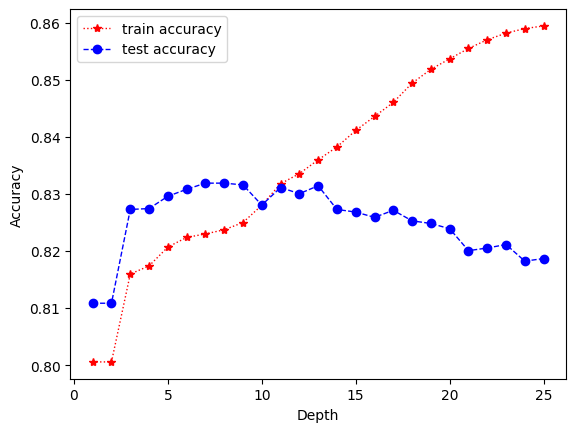

In [76]:
plt.plot(range(1, 26), accuracy_train, label='train accuracy', marker='*', linestyle='dotted', linewidth=1, color='red')
plt.plot(range(1, 26), accuracy_test, label='test accuracy', marker='o', linestyle='dashed', linewidth=1, color='blue')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 10.

- Refit the random forest model using the `max_depth` from above; save the feature importances in a dataframe. 
- Sort the results and print the top five features.

In [80]:
best_cls = DecisionTreeClassifier(max_depth=idx_depth)
best_cls.fit(X_train, y_train)
best_cls.score(X_test, y_test)  

feature_imp_df = pd.DataFrame(zip(X_train.columns, best_cls.feature_importances_),  columns=['feature', 'importance'])
feature_imp_df.sort_values('importance', ascending=False).iloc[0:5]

,feature,importance
1,capital-gain,0.434509
0,age,0.226421
2,capital-loss,0.171273
4,sex_Male,0.086937
3,hours-per-week,0.077799


## 11.

- Looking at the education feature, there are 16 unique values – from preschool to professional school. 
- Rather than adding dummy variables for each value, it makes sense to bin some of these values together.
- While there are many ways to do this, we will take the approach of combining the values into 3 groups: `High school and less`, `College to Bachelors` and `Masters and more`. 
- Create a new column in `df` for this new features called `education_bin`.

In [82]:
df['education_bin'] = pd.cut(df['education-num'], [0,9,13,16], labels=['HS or less', 'College to Bachelors', 'Masters or more'])

## 12.

- Like we did previously, we will now add this new feature into our feature list and recreate `X`.

In [83]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']

## 13.

- As we did before, we will tune the random forest classifier model by testing the performance over a range of `max_depth` values. 
- Fit a random forest classifier for `max_depth` values from 1-25. 
- Save the accuracy score for the train and test sets in the lists `accuracy_train`, `accuracy_test`.

In [85]:
X = pd.get_dummies(df[feature_cols], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

np.random.seed(0)
accuracy_train=[]
accuracy_test = []

for i in range(1, 26):
    cls = DecisionTreeClassifier(max_depth=i)
    cls.fit(X_train, y_train)
    y_pred_train = cls.predict(X_train)
    y_pred_test = cls.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

## 14.

- Find the largest accuracy and the depth this occurs on the test data. 
- Compare the results from the previous model tuned.

In [86]:
idx_depth = np.argmax(accuracy_test) + 1
best_depth = np.max(accuracy_test)
idx_depth, best_depth

(np.int64(10), np.float64(0.8444649163212038))

## 15.

- Plot the training and test accuracy of the models versus the `max_depth`. 
- Compare the results from the previous model tuned.

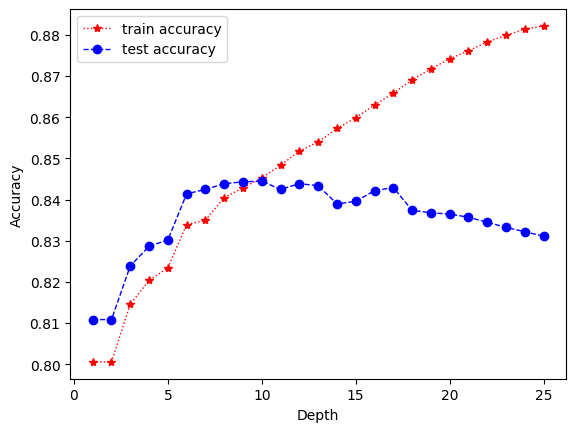

In [87]:
plt.plot(range(1, 26), accuracy_train, label='train accuracy', marker='*', linestyle='dotted', linewidth=1, color='red')
plt.plot(range(1, 26), accuracy_test, label='test accuracy', marker='o', linestyle='dashed', linewidth=1, color='blue')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 16.

- Refit the random forest model using the `max_depth` from above; save the feature importances in a dataframe. 
- Sort the results and print the top five features. 
- Compare the results from the previous model tuned.

In [88]:
best_cls = DecisionTreeClassifier(max_depth=idx_depth)
best_cls.fit(X_train, y_train)
best_cls.score(X_test, y_test)  

feature_imp_df = pd.DataFrame(zip(X_train.columns, best_cls.feature_importances_),  columns=['feature', 'importance'])
feature_imp_df.sort_values('importance', ascending=False).iloc[0:5]

,feature,importance
1,capital-gain,0.367062
0,age,0.203087
2,capital-loss,0.108549
10,education_bin_Masters or more,0.096677
4,sex_Male,0.089655


## 17.

- Note that the accuracy of our final model increased and one of our added features is now in the top 5 based on importance!
- There are a few different ways to extend this project:
    - Are there other features that may lead to an even better performace? Consider creating new ones or adding additional features not part of the original feature list.
    - Consider tuning hyperparameters based on a different evaluation metric – our classes are fairly imbalanced, AUC of F1 may lead to a different result
    - Tune more parameters of the model. You can find a description of all the parameters you can tune in the Random Forest Classifier documentation. For example, see what happens if you tune `max_features` or `n_estimators`.